<a href="https://colab.research.google.com/github/askolesov0608/SJK0015/blob/main/chap13_FIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robotics, Vision & Control 3e: for Python
## Chapter 13: Image Formation

In [1]:
try:
    import google.colab
    print('Running on CoLab')
    !pip install matplotlib
    !pip install machinevision-toolbox-python
    COLAB = True
except:
    COLAB = False

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from machinevisiontoolbox.base import *
from machinevisiontoolbox import *
from spatialmath.base import *
from spatialmath import *



Running on CoLab
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.0/238.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.9/184.9 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46

# 13.1 Perspective Camera
## 13.1.2 Modeling a Perspective Camera


In [2]:
#Создание Модели Перспективной Камеры
camera = CentralCamera(f=0.015); #Создается объект CentralCamera,
                                 #моделирующий перспективную камеру
                                 #с фокусным расстоянием f=0.015 метра (15 мм).
                                 #Эта модель предоставляет средства для имитации проекции точек
                                 #из трехмерного пространства на двумерную плоскость изображения,
                                 #как это делает реальная камера.

In [3]:
#Проекция Трехмерной Точки на Плоскость Изображения
P = [0.3, 0.4, 3.0];

In [4]:
camera.project_point(P) #Задается трехмерная точка P с координатами (0.3, 0.4, 3.0) метра
                        #относительно системы координат камеры.
                        # С помощью метода project_point(P) модель камеры проецирует эту точку
                        #на двумерную плоскость изображения, возвращая координаты точки на изображении.

array([[  0.0015],
       [   0.002]])

In [5]:
camera.project_point(P, pose=SE3.Tx(-0.5)) #Проекция той же точки P, но с учетом измененной позиции камеры.
                                           # Используется SE3.Tx(-0.5),
                                           #чтобы смоделировать сдвиг камеры на 0.5 метра влево по оси X.
                                           # Это демонстрирует, как изменение положения камеры влияет
                                           #на положение проекции точки на плоскости изображения.

array([[   0.004],
       [   0.002]])

## 13.1.3 Discrete Image Plane


Моделирование Дискретной Плоскости Изображения

In [6]:
camera = CentralCamera(f=0.015, rho=10e-6,
 imagesize=[1280, 1024], pp=[640, 512], name="mycamera")
          #оздание объекта CentralCamera с дополнительными параметрами:
          #rho=10e-6 (размер пикселя в метрах),
          #imagesize=[1280, 1024] (размер изображения в пикселях), и
          # pp=[640, 512] (координаты главной точки в пикселях).
          #name="mycamera" задает имя для камеры.
                   #Эти параметры позволяют более точно моделировать процесс формирования
                   #изображения, включая дискретизацию плоскости изображения.

           Name: mycamera [CentralCamera]
     pixel size: 1e-05 x 1e-05
     image size: 1280 x 1024
           pose: t = 0, 0, 0; rpy/yxz = 0°, 0°, 0°
   principal pt: [     640      512]
   focal length: [   0.015    0.015]

In [7]:
camera.project_point(P)  #Снова проецирует точку P на плоскость изображения,
                         #но теперь с учетом дополнительных параметров камеры, введенных ранее.
                         #Это показывает, как размер пикселя, размер изображения и позиция главной точки влияют
                         # на конечное положение проекции точки.

array([[     790],
       [     712]])

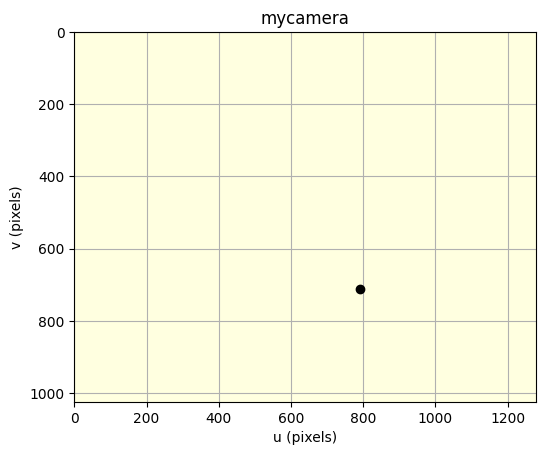

In [8]:
camera.plot_point(P);

## 13.1.4 Camera Matrix


In [9]:
camera.K #возвращает камерную матрицу для модели CentralCamera.
         #Камерная матрица K включает внутренние параметры камеры,
         # такие как фокусное расстояние и координаты главной точки,
         #и используется для проецирования трехмерных точек на плоскость изображения.

array([[    1500,        0,      640],
       [       0,     1500,      512],
       [       0,        0,        1]])

In [10]:
camera.C() # возвращает положение центра камеры в мировых координатах.
             #Это полезно для понимания взаимного расположения камеры и объектов в сцене.

array([[    1500,        0,      640,        0],
       [       0,     1500,      512,        0],
       [       0,        0,        1,        0]])

In [11]:
np.rad2deg(camera.fov()) #camera.fov() возвращает угол обзора камеры в радианах,
                           #а np.rad2deg конвертирует этот угол в градусы.
                            #Угол обзора определяет ширину поля зрения камеры,
                            #что важно для понимания, какая часть сцены будет захвачена.

array([   46.21,    37.69])

In [12]:
P = np.column_stack([[0, 0, 10], [10, 10, 10]]) #Создает две трехмерные точки и проецирует их на плоскость изображения
                                                #с проверкой их видимости. visibility=True позволяет определить,
                                                #находятся ли проецируемые точки внутри видимой области камеры.
p, visible = camera.project_point(P, visibility=True)
visible #Выводит список булевых значений, указывающих, видима ли каждая из проецируемых точек.

array([ True, False])

## 13.1.5 Projecting Points


In [13]:
#Создание Сетки Точек
P = mkgrid(n=3, side=0.2, pose=SE3.Tz(1.0));
                    #mkgrid создает сетку трехмерных точек размером 3x3 с
                    #заданным размером стороны и располагает ее
                    #на расстоянии 1 метр от камеры по оси Z (SE3.Tz(1.0)).

P.shape            #Выводит размерность массива точек, показывая количество точек и их координаты.

(3, 9)

In [14]:
P[:, :4] #Выводит координаты первых четырех точек в сетке.

array([[    -0.1,     -0.1,     -0.1,        0],
       [    -0.1,        0,      0.1,     -0.1],
       [       1,        1,        1,        1]])

In [15]:
camera.project_point(P) #Проецирует сетку точек P на плоскость изображения.

array([[     490,      490,      490,      640,      640,      640,      790,      790,      790],
       [     362,      512,      662,      362,      512,      662,      362,      512,      662]])

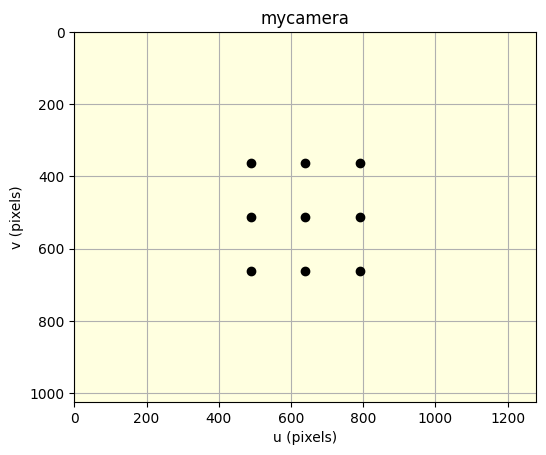

In [16]:
camera.plot_point(P); #Визуализирует проекцию точек сетки на изображении, создаваемом камерой

In [17]:
#Проекция Точек с Измененной Позицией Камеры
T_camera = SE3.Trans(-1, 0, 0.5) * SE3.Ry(0.9); #Определяет новую позицию и ориентацию камеры
                                                 #относительно ее начального положения, применяя смещение и поворот.

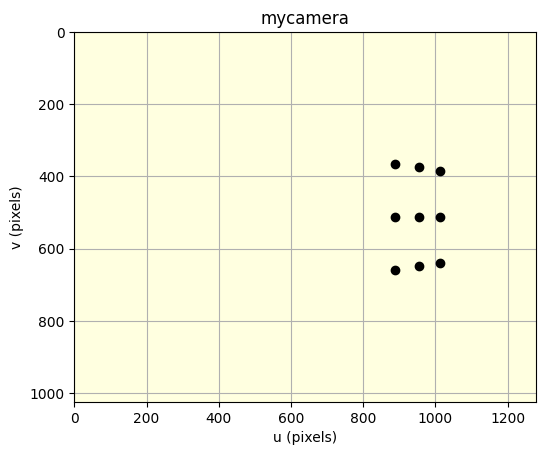

In [18]:
camera.plot_point(P, pose=T_camera); #Визуализирует точки сетки P на изображении с учетом
                                     #измененной позиции и ориентации камеры, заданных T_camera.


In [19]:
camera.project_point([1, 0, 0, 0], pose=T_camera) #Проецирует точку [1, 0, 0, 0]
                                                  #(с добавлением однородной координаты для трехмерной точки) на плоскость изображения,
                                                  # используя позицию T_camera.


array([[    1434],
       [   401.1],
       [  0.7833]])

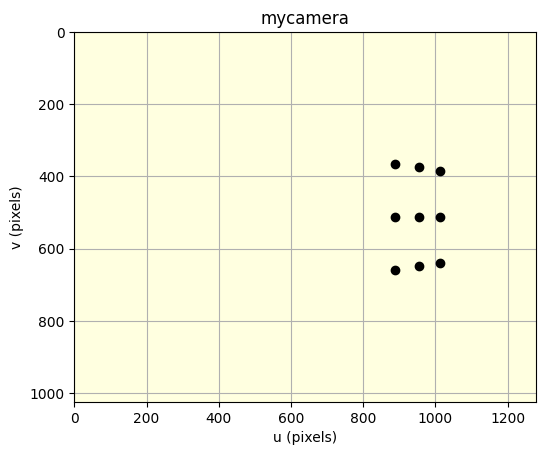

array([[   887.8,    887.8,    887.8,    955.2,    955.2,    955.2,     1014,     1014,     1014],
       [   364.3,      512,    659.7,    374.9,      512,    649.1,    384.1,      512,    639.9]])

In [20]:
p = camera.plot_point(P, pose=T_camera) #Повторно визуализирует точки сетки P
                                        #с учетом позиции T_camera,
                                        #сохраняя результат в переменную p для возможного дальнейшего использования.
p

In [138]:
camera = CentralCamera(f=0.015, rho=10e-6,
 imagesize=[1280, 1024], pp=[640, 512], name="mycamera")
          #оздание объекта CentralCamera с дополнительными параметрами:
          #rho=10e-6 (размер пикселя в метрах),
          #imagesize=[1280, 1024] (размер изображения в пикселях), и
          # pp=[640, 512] (координаты главной точки в пикселях).
          #name="mycamera" задает имя для камеры.
                   #Эти параметры позволяют более точно моделировать процесс формирования
                   #изображения, включая дискретизацию плоскости изображения.

           Name: mycamera [CentralCamera]
     pixel size: 1e-05 x 1e-05
     image size: 1280 x 1024
           pose: t = 0, 0, 0; rpy/yxz = 0°, 0°, 0°
   principal pt: [     640      512]
   focal length: [   0.015    0.015]

In [120]:
cube = mkcube(0.2, pose=SE3.Tz(1)); #создает трехмерный куб со стороной 0.2 метра.
                                    #Аргумент pose=SE3.Tz(1) задает позицию куба так,
                                    #что он располагается на 1 метр вперед
                                    #от начальной точки камеры по оси Z.
                                    #Возвращает координаты вершин куба.
cube.shape           #Выводит форму массива cube, которая показывает количество точек (вершин) и их размерность.

(3, 8)

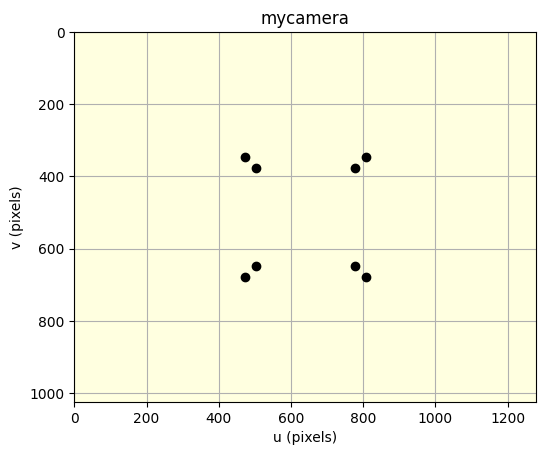

In [121]:
camera.plot_point(cube);  #роецирует вершины куба cube на изображение и визуализирует их.
                          #Это демонстрирует, как куб будет выглядеть с текущего положения камеры.

In [122]:
X, Y, Z = mkcube(0.2, pose=SE3.Tz(1), edge=True) #Создает куб с возможностью визуализации его каркаса.
                                                 #edge=True указывает на возвращение координат рёбер куба в
                                                 #отдельных массивах X, Y, Z.
                                                 #Позиция куба задается аналогично предыдущему вызову.

X.shape  #Выводит размерность массива X, что дает представление о количестве точек в одной из координат рёбер куба.

(2, 5)

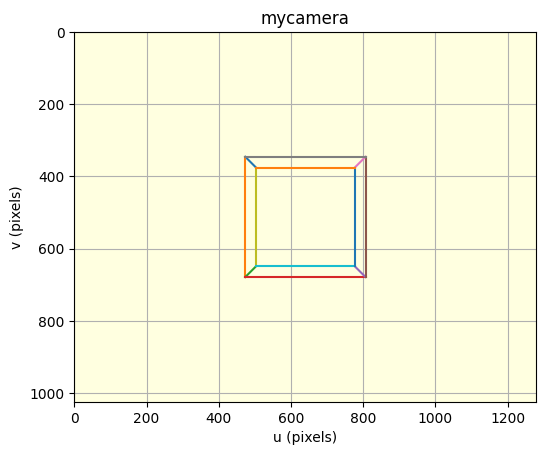

In [123]:
camera.plot_wireframe(X, Y, Z) #визуализирует каркас куба на изображении, используя координаты рёбер X, Y, Z.

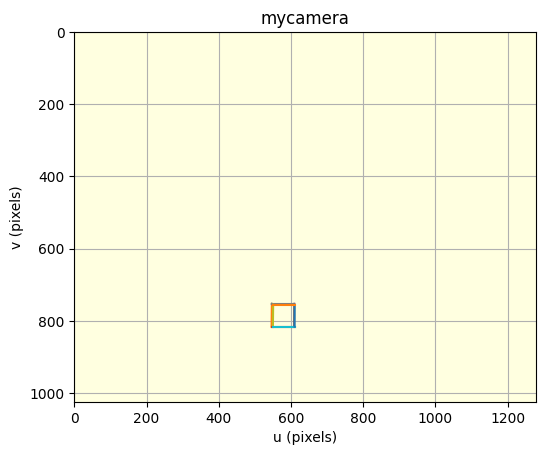

In [127]:
camera.plot_wireframe(X, Y, Z, pose=T_camera); #Визуализирует каркас куба с новой позицией камеры T_camera.
                                               # Это демонстрирует, как изменение положения камеры влияет на восприятие формы
                                               #и ориентации объекта.

Анимация Вращения Куба

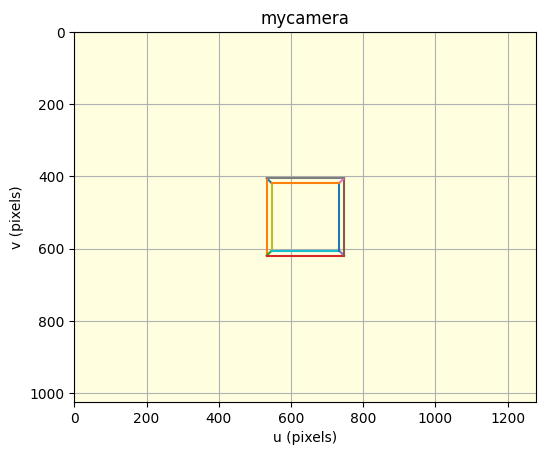

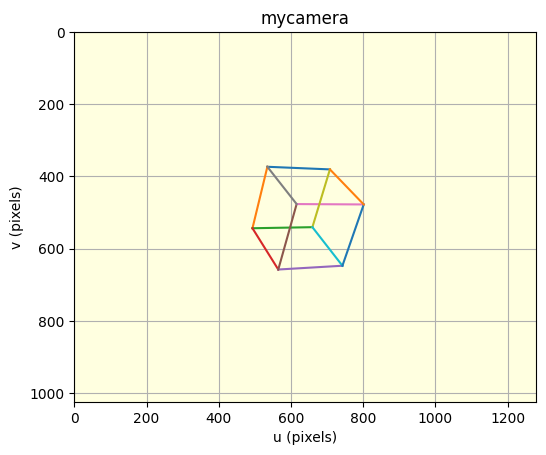

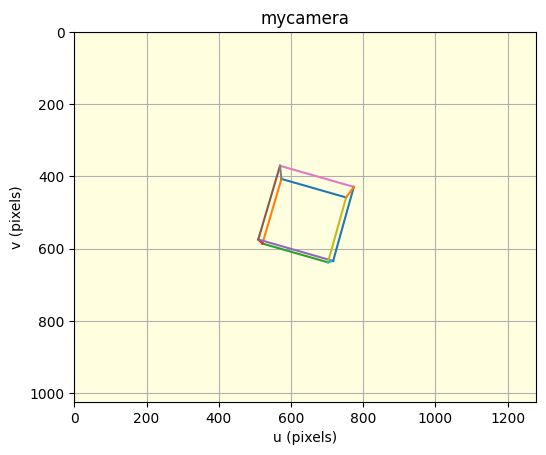

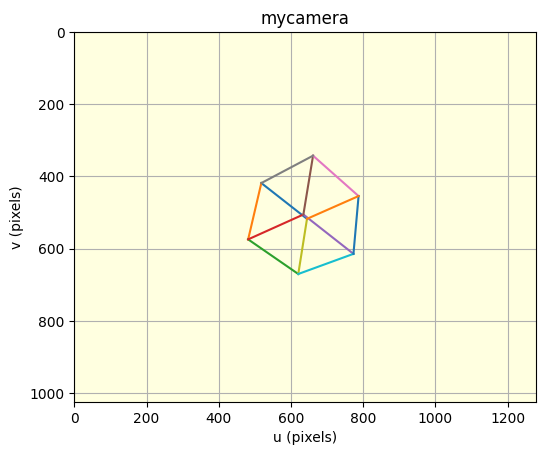

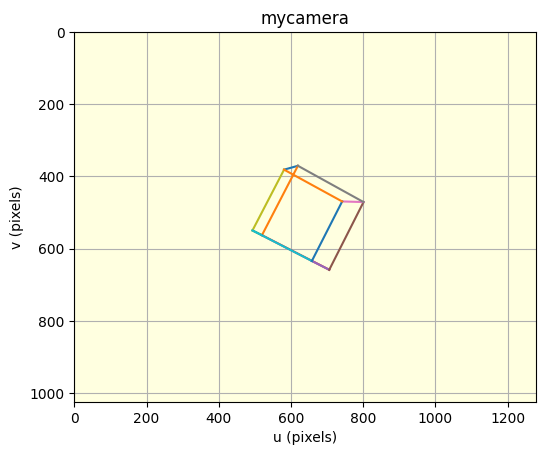

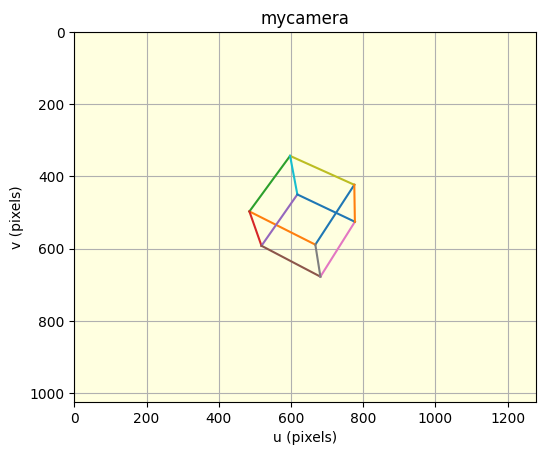

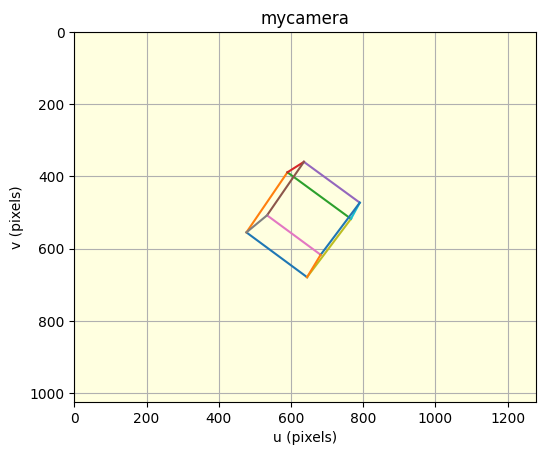

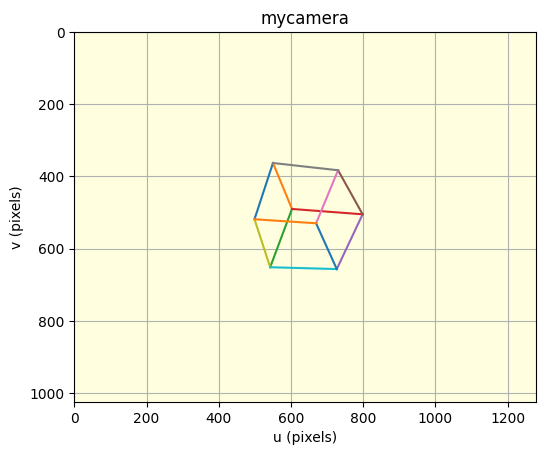

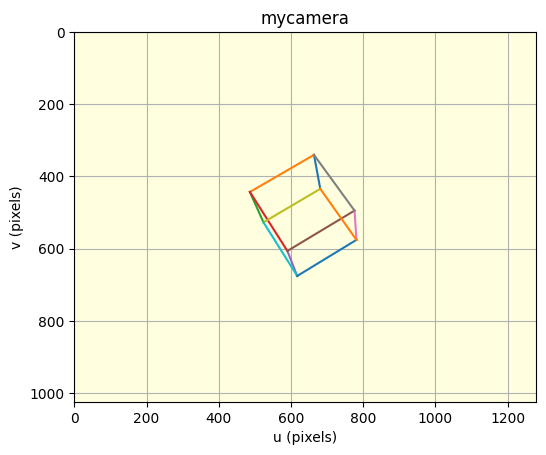

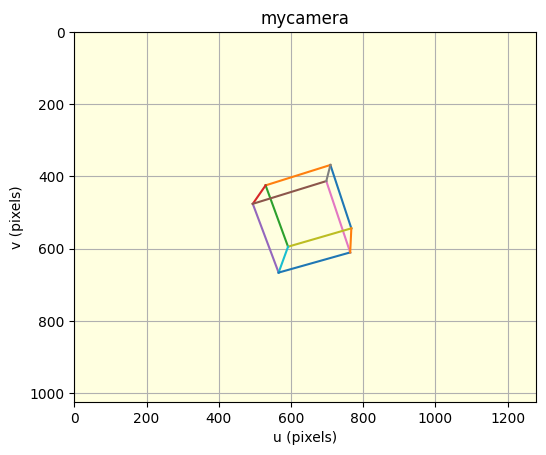

In [126]:
X, Y, Z = mkcube(0.2, edge=True)        #Создает куб без заданной позиции, предназначенный для каркасной визуализации.

for theta in np.linspace(0, 2 * pi, 10): #Итерирует через значения theta от 0 до 2 * pi,
                                         #разделяя этот диапазон на 10 шагов.
                                         # Каждое значение theta используется для создания новой позиции (ориентации) куба.

  T_cube = SE3.Tz(1.5) * SE3.RPY(theta * np.array([1.1, 1.2, 1.3])) #Генерирует трансформацию для куба,
                                                                    #сочетая сдвиг по оси Z на 1.5 метра с вращением вокруг осей,
                                                                    #зависящим от theta. Вектор [1.1, 1.2, 1.3] задает пропорции
                                                                    #вращения вокруг каждой оси.

  camera.clf()   #Очищает текущее изображение камеры перед отрисовкой новой позиции куба, чтобы анимация была плавной.

  camera.plot_wireframe(X, Y, Z, objpose=T_cube) #Визуализирует каркас куба с учетом его текущей трансформации T_cube.

  plt.pause(0.1)  #Визуализирует каркас куба с учетом его текущей трансформации T_cube.

<span style="background-color:red; font-size:20pt">NOTE</span>

This style of animation works well for a Python script.  However, using Jupyter it produces a set of separate images.  The number of frames shown here has been reduced to 10, from 100 as per the in-book example.

## 13.1.6 Lens Distortion


In [128]:
 #Учет Искажений Линзы
 camera = CentralCamera(f=0.015, rho=10e-6, #Создает объект CentralCamera,
                                            #моделирующий перспективную камеру.
                                            # Параметры
                                              #f (фокусное расстояние) и
                                              #rho (размер пикселя) задают основные характеристики камеры.
                                               # imagesize определяет разрешение изображения, а
                                               #pp — координаты главной точки (центра проекции).
   imagesize=[1280, 1024], pp=[512, 512],
   distortion=[k1, k2, k3, p1, p2])            #distortion содержит параметры искажений линзы:
                                               #радиальные k1, k2, k3 и тангенциальные p1, p2.
                                                #Эти параметры используются для моделирования искажений,
                                                # вносимых линзой камеры, таких как радиальное искажение
                                                 #(изгиб линий из-за неравномерного увеличения с расстоянием от центра)
                                                 #и тангенциальное искажение (сдвиг изображения из-за неидеального выравнивания линз).

           Name: perspective [CentralCamera]
     pixel size: 1e-05 x 1e-05
     image size: 1280 x 1024
           pose: t = 0, 0, 0; rpy/yxz = 0°, 0°, 0°
   principal pt: [     512      512]
   focal length: [   0.015    0.015]

# 13.2 Camera Calibration
## 13.2.1 Calibrating with a 3D Target


In [148]:
P = mkcube(0.2); #Создает набор точек в форме куба с ребром 0.2 метра,
                 #который будет использоваться в качестве 3D-цели для калибровки камеры.

In [149]:
#camera.plot_point(P)
camera.project_point(P)

array([[     nan,      nan,      nan,      nan,     -860,     -860,     2140,     2140],
       [     nan,      nan,      nan,      nan,     -988,     2012,     2012,     -988]])

In [150]:
T_unknown = SE3.Trans(0.1, 0.2, 1.5) * SE3.RPY(0.1, 0.2, 0.3); #Создает трансформацию T_unknown,
                                                               # представляющую неизвестное положение и ориентацию камеры относительно 3D-цели.
                                                                #Используется для моделирования ситуации,
                                                                #когда точная позиция камеры относительно объекта неизвестна.

In [151]:
camera_unknown = CentralCamera(f=0.015, rho=10e-6, imagesize=[1280, 1024], noise=0.05, seed=0)
               #Создает объект CentralCamera, имитирующий камеру с неизвестной позицией
               #и добавленным шумом (noise=0.05) в проекции точек,
               #что приближает ситуацию к реальным условиям съемки.

           Name: perspective [CentralCamera]
     pixel size: 1e-05 x 1e-05
     image size: 1280 x 1024
           pose: t = 0, 0, 0; rpy/yxz = 0°, 0°, 0°
   principal pt: [     640      512]
   focal length: [   0.015    0.015]

In [152]:
#Проекция 3D-Цели с Учетом Неизвестной Позиции
p = camera_unknown.project_point(P, objpose=T_unknown); #Проецирует точки 3D-цели P на плоскость изображения,
                                                       # используя неизвестное положение и ориентацию камеры T_unknown.
                                                       #Результат p содержит координаты проецированных точек на изображении.

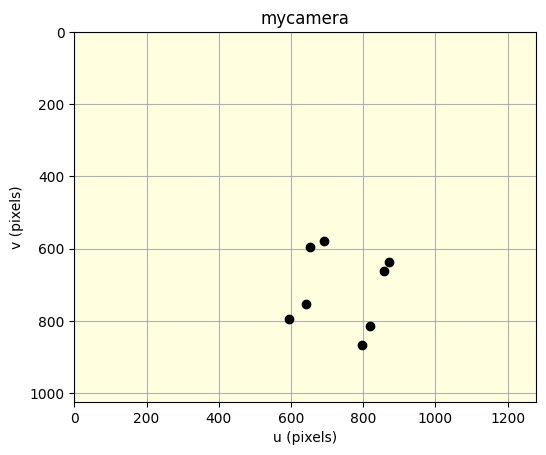

array([[   652.8,      595,    795.5,    857.8,      692,    640.7,    817.7,    872.5],
       [     596,    795.1,    865.6,    661.7,    578.8,    754.4,    815.2,      636]])

In [153]:
camera.plot_point(p)

In [32]:
#Вычисление Позиции Камеры и Остаточной Ошибки
C, resid = CentralCamera.points2C(P, p)
           #CentralCamera.points2C(P, p) вычисляет позицию камеры (C)
           #на основе известных 3D-координат точек P и их проекций на изображении p.
            #Возвращает также остаточную ошибку resid,
             #характеризующую разницу между фактическими и ожидаемыми проекциями.
C #вычисления позиции камеры C

array([[   852.8,   -233.1,    633.6,      740],
       [     223,      990,    294.8,      712],
       [  -0.131,  0.06549,   0.6488,        1]])

In [33]:
resid # и остаточной ошибки resid.

0.0376726171853079

## 13.2.2 Calibrating with a Checkerboard


14

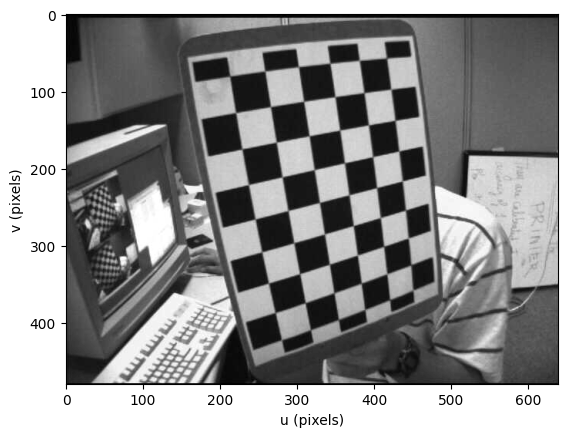

In [34]:
images = ImageCollection("calibration/*.jpg");
images[13].disp()  # display image12


In [154]:
len(images) #len(images))
            #выводит общее количество изображений в коллекции, что позволяет оценить объем данных, доступных для калибровки.

14

In [35]:
K, distortion, frames = CentralCamera.images2C(images, gridshape=(7,6), squaresize=25e-3)
                       #калибрует камеру, используя коллекцию изображений.
                       # Параметр gridshape=(7,6) задает размеры сетки шахматной доски
                        #(количество углов внутри шахматной доски по вертикали и горизонтали),
                        #а squaresize=25e-3 указывает физический размер одной клетки шахматной доски в метрах.
                        # В результате возвращает внутренние параметры камеры K,
                          #параметры искажения distortion и позиции каждого кадра (изображения)
                          #относительно шахматной доски в виде списка frames.#

In [36]:
K                #Выводит матрицу внутренних параметров камеры K,
                 #которая включает фокусное расстояние и координаты главной точки.

array([[   534.1,        0,    341.5],
       [       0,    534.1,    232.9],
       [       0,        0,        1]])

In [37]:
images[0].centre  #Выводит координаты центра первого изображения в коллекции.
                  # Это может быть использовано для проверки или сравнения с
                  # полученными в результате калибровки параметрами.

(319.5, 239.5)

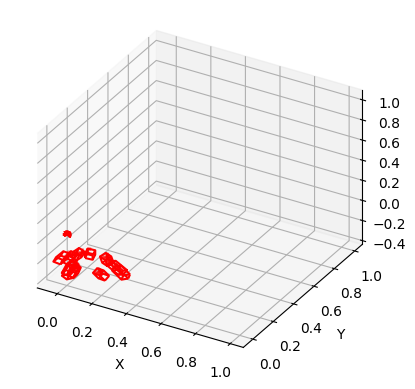

In [160]:
for frame in frames:
  CentralCamera.plot(pose=frame.pose, scale=0.08) #Проходит по каждому frame в списке frames,
                                                  #полученном в результате калибровки, и визуализирует позицию камеры
                                                  #для каждого изображения относительно шахматной доски.
                                                  # pose=frame.pose указывает на позицию камеры,
                                                  #scale=0.05 задает масштаб для визуализации.

In [39]:
distortion #Выводит параметры искажения distortion, определенные в результате калибровки.
          # Эти параметры важны для коррекции искажений изображения, вызванных линзой камеры.

array([  -0.293,   0.1077,  0.00131, -3.109e-05,  0.04348])

### 13.2.2.1 Correcting for Lens Distortion


In [161]:
#Извлекаются основные параметры камеры и искажения из ранее полученных результатов калибровки.
u0 = K[0, 2]; #u0 и v0 представляют координаты главной точки на изображении,
v0 = K[1, 2];
fpix_u = K[0, 0];  #fpix_u и fpix_v — фокусные расстояния в пикселях по осям U и V соответственно.
fpix_v = K[1,1];
k1, k2, p1, p2, k3 = distortion;  #k1, k2, k3 — коэффициенты радиального искажения,
                                  #p1, p2 — коэффициенты тангенциального искажения.

In [162]:
u0

341.5340980921839

In [163]:
v0

232.9456383012454

In [164]:
fpix_u

534.0708923015919

In [165]:
fpix_v

534.1191493077605

In [166]:
k1, k2, p1, p2, k3

(-0.29297181779812076,
 0.10770780910382735,
 0.001310387004338355,
 -3.1087472427987805e-05,
 0.0434787146654161)

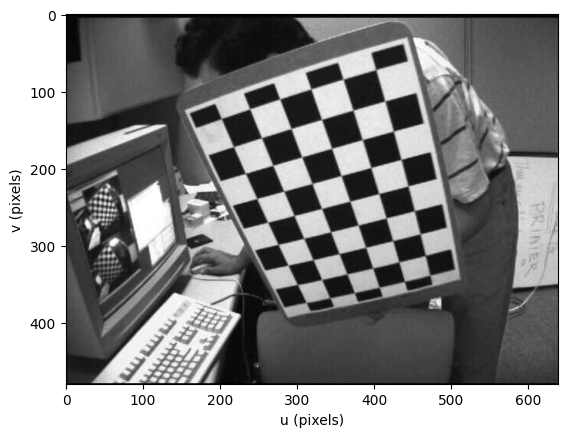

In [168]:
images[12].disp()

In [169]:
U, V = images[12].meshgrid()
#Здесь предполагается извлечение массивов координат пикселей U и V из изображения с индексом 12 в коллекции.

In [170]:
U, V

(array([[  0,   1,   2, ..., 637, 638, 639],
        [  0,   1,   2, ..., 637, 638, 639],
        [  0,   1,   2, ..., 637, 638, 639],
        ...,
        [  0,   1,   2, ..., 637, 638, 639],
        [  0,   1,   2, ..., 637, 638, 639],
        [  0,   1,   2, ..., 637, 638, 639]]),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [477, 477, 477, ..., 477, 477, 477],
        [478, 478, 478, ..., 478, 478, 478],
        [479, 479, 479, ..., 479, 479, 479]]))

In [42]:
u = (U - u0) / fpix_u;
v = (V - v0) / fpix_v;
#Преобразуют координаты пикселей изображения в нормализованные координаты,
#смещая их относительно главной точки и масштабируя с использованием фокусного расстояния.
#Это переводит пиксели в систему координат, где центр изображения соответствует (0,0).

In [171]:
u,v

(array([[ -0.6395,  -0.6376,  -0.6357, ...,   0.5532,   0.5551,    0.557],
        [ -0.6395,  -0.6376,  -0.6357, ...,   0.5532,   0.5551,    0.557],
        [ -0.6395,  -0.6376,  -0.6357, ...,   0.5532,   0.5551,    0.557],
        ...,
        [ -0.6395,  -0.6376,  -0.6357, ...,   0.5532,   0.5551,    0.557],
        [ -0.6395,  -0.6376,  -0.6357, ...,   0.5532,   0.5551,    0.557],
        [ -0.6395,  -0.6376,  -0.6357, ...,   0.5532,   0.5551,    0.557]]),
 array([[ -0.4361,  -0.4361,  -0.4361, ...,  -0.4361,  -0.4361,  -0.4361],
        [ -0.4343,  -0.4343,  -0.4343, ...,  -0.4343,  -0.4343,  -0.4343],
        [ -0.4324,  -0.4324,  -0.4324, ...,  -0.4324,  -0.4324,  -0.4324],
        ...,
        [  0.4569,   0.4569,   0.4569, ...,   0.4569,   0.4569,   0.4569],
        [  0.4588,   0.4588,   0.4588, ...,   0.4588,   0.4588,   0.4588],
        [  0.4607,   0.4607,   0.4607, ...,   0.4607,   0.4607,   0.4607]]))

In [172]:
r = np.sqrt(u**2 + v**2); #Вычисляется радиальное расстояние от каждой точки до центра изображения.

In [173]:
r

array([[  0.7741,   0.7725,    0.771, ...,   0.7045,   0.7059,   0.7074],
       [   0.773,   0.7715,   0.7699, ...,   0.7033,   0.7048,   0.7063],
       [   0.772,   0.7704,   0.7689, ...,   0.7022,   0.7036,   0.7051],
       ...,
       [   0.786,   0.7844,   0.7829, ...,   0.7175,    0.719,   0.7204],
       [  0.7871,   0.7855,    0.784, ...,   0.7187,   0.7202,   0.7216],
       [  0.7881,   0.7866,   0.7851, ...,   0.7199,   0.7214,   0.7228]])

In [44]:
delta_u = u * (k1*r**2 + k2*r**4 + k3*r**6) + p1*u*v + p2*(r**2 + 2*u**2);
delta_v = v * (k1*r**2 + k2*r**4 + k3*r**6) + p1*(r**2 + 2*v**2) + p2*u*v;
#Вычисляются радиальные и тангенциальные искажения для каждой точки. delta_u и delta_v
#представляют собой смещения, которые необходимо применить к каждой точке, чтобы исправить искажение.

In [174]:
delta_u, delta_v

(array([[ 0.08187,  0.08145,  0.08103, ..., -0.06317, -0.06356, -0.06395],
        [ 0.08174,  0.08133,  0.08091, ..., -0.06303, -0.06342, -0.06381],
        [ 0.08162,   0.0812,  0.08078, ..., -0.06289, -0.06328, -0.06367],
        ...,
        [ 0.08247,  0.08206,  0.08165, ..., -0.06407, -0.06446, -0.06485],
        [ 0.08259,  0.08218,  0.08177, ..., -0.06421,  -0.0646, -0.06499],
        [ 0.08271,   0.0823,  0.08189, ..., -0.06435, -0.06474, -0.06512]]),
 array([[ 0.05689,  0.05676,  0.05664, ...,  0.05068,  0.05082,  0.05096],
        [ 0.05656,  0.05644,  0.05631, ...,  0.05035,  0.05049,  0.05064],
        [ 0.05623,  0.05611,  0.05598, ...,  0.05003,  0.05017,  0.05031],
        ...,
        [-0.05787, -0.05775, -0.05763, ..., -0.05195, -0.05209, -0.05222],
        [-0.05819, -0.05807, -0.05795, ..., -0.05228, -0.05241, -0.05255],
        [-0.05851, -0.05839, -0.05828, ..., -0.05261, -0.05274, -0.05288]]))

In [45]:
ud = u + delta_u; vd = v + delta_v; #К нормализованным координатам добавляются вычисленные смещения для коррекции искажений.

In [175]:
ud

array([[ -0.5576,  -0.5562,  -0.5547, ...,   0.4901,   0.4915,    0.493],
       [ -0.5577,  -0.5563,  -0.5548, ...,   0.4902,   0.4917,   0.4932],
       [ -0.5579,  -0.5564,   -0.555, ...,   0.4903,   0.4918,   0.4933],
       ...,
       [  -0.557,  -0.5556,  -0.5541, ...,   0.4892,   0.4906,   0.4921],
       [ -0.5569,  -0.5554,   -0.554, ...,    0.489,   0.4905,    0.492],
       [ -0.5568,  -0.5553,  -0.5539, ...,   0.4889,   0.4904,   0.4919]])

In [46]:
Ud = ud * fpix_u + u0;
Vd = vd * fpix_v + v0;
#Преобразование корректированных нормализованных координат обратно в пиксельные координаты.

In [176]:
Ud, Vd

(array([[   43.72,     44.5,    45.28, ...,    603.3,    604.1,    604.8],
        [   43.66,    44.43,    45.21, ...,    603.3,    604.1,    604.9],
        [   43.59,    44.37,    45.14, ...,    603.4,    604.2,      605],
        ...,
        [   44.04,    44.83,    45.61, ...,    602.8,    603.6,    604.4],
        [   44.11,    44.89,    45.67, ...,    602.7,    603.5,    604.3],
        [   44.17,    44.95,    45.73, ...,    602.6,    603.4,    604.2]]),
 array([[   30.39,    30.32,    30.25, ...,    27.07,    27.15,    27.22],
        [   31.21,    31.14,    31.08, ...,    27.89,    27.97,    28.05],
        [   32.04,    31.97,     31.9, ...,    28.72,    28.79,    28.87],
        ...,
        [   446.1,    446.2,    446.2, ...,    449.3,    449.2,    449.1],
        [   446.9,      447,      447, ...,    450.1,      450,    449.9],
        [   447.7,    447.8,    447.9, ...,    450.9,    450.8,    450.8]]))

In [178]:
undistorted = images[12].warp(Ud, Vd) #Создает новое изображение без искажений,
#применяя рассчитанные корректированные координаты Ud и Vd к изображению с индексом 12.

Image: 640 x 480 (uint8)

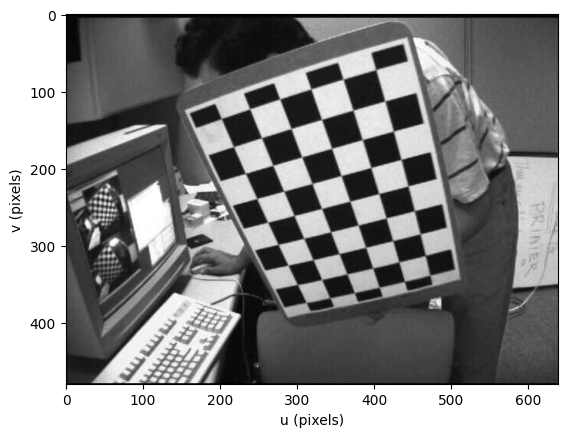

In [180]:
images[12].disp()

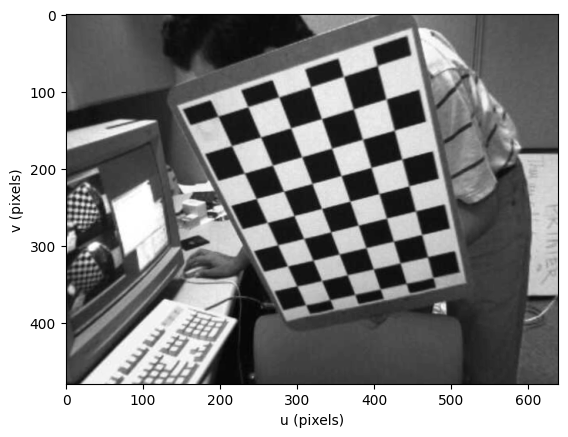

In [179]:
undistorted.disp()

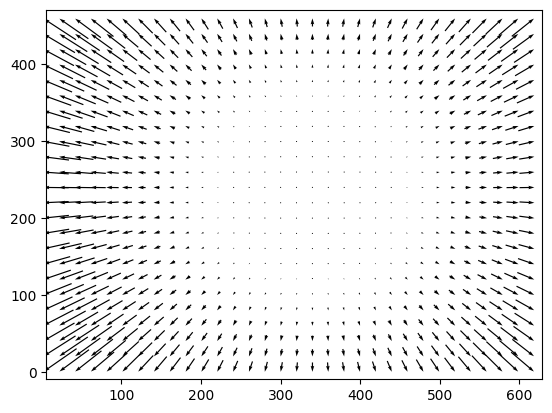

In [181]:
plt.clf()   # clear 3D plot #plt.clf() очищает текущий график. Затем

plt.quiver(Ud[::20, ::20], Vd[::20, ::20], -delta_u[::20, ::20], -delta_v[::20, ::20]);
#создает векторное поле, показывающее, как и насколько должны быть скорректированы пиксели
# изображения для устранения искажений линзы.
#Используются сэмплированные значения для уменьшения
#количества стрелок в векторном поле для улучшения визуализации.

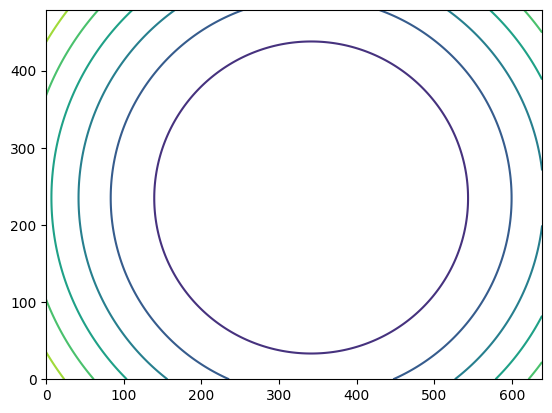

In [49]:
magnitude = np.sqrt(delta_u**2 + delta_v**2); #Вычисляется величина коррекции для каждого пикселя
                                              # (как евклидово расстояние изменений в u и v)

plt.contour(U, V, magnitude);        #plt.contour() отображает контурную карту этой величины, демонстрируя области наибольших искажений.

Разложение Матрицы Калибровки Камеры

In [50]:
# ## 13.2.3 Decomposing the Camera Calibration Matrix
o = linalg.null_space(C); #Находит нулевое пространство (null space) матрицы калибровки C,
                          #которое представляет собой точку на бесконечности в проективном пространстве,
                          #соответствующую центру проекции камеры.

o.T      #Транспонирует вектор o для удобства дальнейшего использования или отображения.

array([[ 0.08068,  -0.1712,  -0.8136,   0.5497]])

In [51]:
h2e(o).T #Преобразует гомогенные координаты в евклидовы, возможно, с помощью функции h2e()
          # (не представленной в данном фрагменте), что обычно включает деление на последнюю координату.

array([[  0.1468,  -0.3114,    -1.48]])

In [52]:
T_unknown.inv().t  #Выводит вектор переноса (t) из обратной трансформации неизвестной позиции камеры T_unknown.

array([  0.1464,  -0.3105,   -1.477])

In [53]:
est = CentralCamera.decomposeC(C) #Разлагает матрицу калибровки C на составляющие параметры камеры, используя метод decomposeC().

           Name: invC [CentralCamera]
     pixel size: 1.0 x 0.9999371154789839
           pose: t = 0.147, -0.311, -1.48; rpy/yxz = -16.1°, -5.65°, -11.4°
   principal pt: [   642.1    512.9]
   focal length: [    1504     1504]

In [182]:
est.f / est.rho[0] #Вычисляет фактическое фокусное расстояние камеры в метрах?,
                   #разделив полученное фокусное расстояние est.f на размер пикселя est.rho[0].

array([    1504,     1504])

In [55]:
camera.f / camera.rho[0] #Аналогично вычисляет фокусное расстояние для исходной камеры для сравнения.

array([    1500,     1500])

In [56]:
(T_unknown * est.pose).printline(orient="camera") #Выводит ориентацию камеры,
                                                  #учитывая неизвестную позицию T_unknown и оцененную позицию est.pose.

t = -0.000106, -0.000605, -0.00303; rpy/yxz = -0.0159°, -0.0615°, 0.0872°


Визуализация Результатов

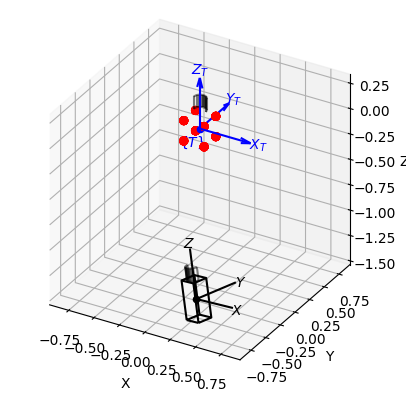

In [188]:
plotvol3([-0.9, 0.9, -0.9, 0.9, -1.5, 0.3]); #Определяет объем для визуализации в трехмерном пространстве.
plot_sphere(0.03, P, color="r");             #Визуализирует точки куба P в виде сфер красного цвета.
SE3().plot(frame="T", color="b", length=0.5);  #Визуализирует систему координат с использованием единичной трансформации SE3().
est.plot(scale=0.3, color="black", frame=True);  #Визуализирует оцененное положение камеры с масштабом 0.3, черным цветом и отображением системы координат.

## 13.2.4 Pose Estimation with a Calibrated Camera


Создание Калиброванной Камеры с Шумом

In [198]:
camera_calib = CentralCamera.Default(noise=0.1, seed=0);
  #Инициализируется объект CentralCamera с параметрами по умолчанию
  #и добавляется шум к проекциям точек (noise=0.1), чтобы симулировать реальные условия съемки.
  #Аргумент seed=0 используется для обеспечения воспроизводимости результатов.

In [199]:
P = mkcube(0.2);
#Создает трехмерную модель объекта в виде куба со стороной 0.2 метра с помощью функции mkcube.

In [200]:
P

array([[    -0.1,     -0.1,      0.1,      0.1,     -0.1,     -0.1,      0.1,      0.1],
       [    -0.1,      0.1,      0.1,     -0.1,     -0.1,      0.1,      0.1,     -0.1],
       [    -0.1,     -0.1,     -0.1,     -0.1,      0.1,      0.1,      0.1,      0.1]])

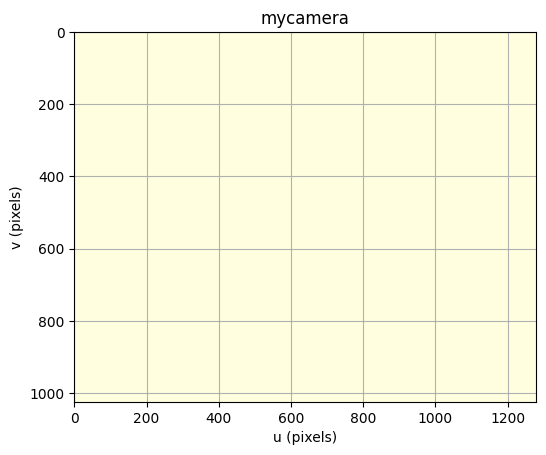

array([[     nan,      nan,      nan,      nan,     -860,     -860,     2140,     2140],
       [     nan,      nan,      nan,      nan,     -988,     2012,     2012,     -988]])

In [203]:
camera.plot_point(P)

In [60]:
T_unknown = SE3.Trans(0.1, 0.2, 1.5) * SE3.RPY(0.1, 0.2, 0.3); #Определяет неизвестную позицию объекта
                                                          #относительно камеры, используя комбинацию трансляции и вращения.
                                                          #Эта позиция будет использоваться для
                                                          #проецирования точек объекта на изображение.
T_unknown.printline()  #Выводит параметры неизвестной позиции T_unknown в удобочитаемом формате.

t = 0.1, 0.2, 1.5; rpy/zyx = 5.73°, 11.5°, 17.2°


In [205]:
p = camera_calib.project_point(P, objpose=T_unknown); #Проецирует точки 3D-модели P на изображение,
                                                      #используя заданную неизвестную позицию T_unknown.
                                                      #Результат p содержит координаты проекций точек на изображении.
p

array([[   506.8,      476,    582.9,    616.2,    527.7,    500.3,    594.8,    624.1],
       [   544.7,    651.2,    688.8,    579.9,    535.7,    629.3,    661.9,    566.3]])

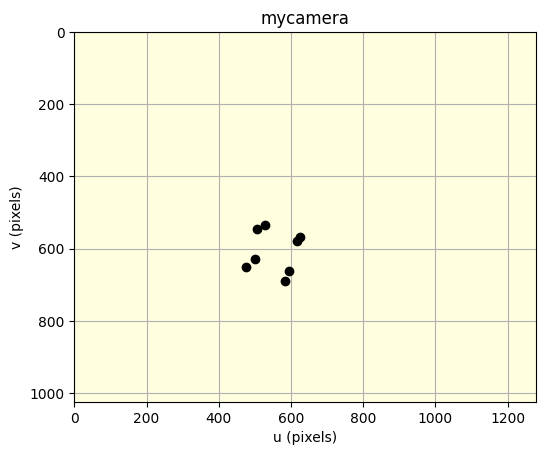

array([[   506.8,      476,    582.9,    616.2,    527.7,    500.3,    594.8,    624.1],
       [   544.7,    651.2,    688.8,    579.9,    535.7,    629.3,    661.9,    566.3]])

In [207]:
camera.plot_point(p)

In [206]:
T_est = camera_calib.estpose(P, p).printline()  #Осуществляет оценку позиции объекта на основе его известных 3D-координат
                                                #P и проекций p на изображении.
                                                #Функция estpose возвращает оценку позиции T_est,
                                                #которая затем выводится на экран.
                                                #Этот шаг демонстрирует, как из проекций точек на изображении можно восстановить
                                                #пространственное положение объекта.

t = 0.1, 0.2, 1.5; rpy/zyx = 5.72°, 11.5°, 17.2°


# 13.3 Wide Field-of-View Cameras
## 13.3.1 Fisheye Lens Camera


In [63]:
camera = FishEyeCamera(
          projection="equiangular",
          rho=10e-6,
          imagesize=[1280, 1024]
          );
          #Создает объект FishEyeCamera, который моделирует камеру с объективом "рыбий глаз".
          # Параметр projection="equiangular" указывает на использование
            #эквиугольной проекции, что является характерным для многих реальных объективов "рыбий глаз".
            # rho=10e-6 задает размер пикселя, а imagesize=[1280, 1024] — размеры изображения в пикселях.


In [64]:
X, Y, Z = mkcube(side=1, centre=[1, 1, 0.8], edge=True); #Создает куб со стороной 1 метр,
                                           #центр которого расположен в точке [1, 1, 0.8].
                                           # Опция edge=True указывает на необходимость
                                           #генерации данных для визуализации ребер куба.

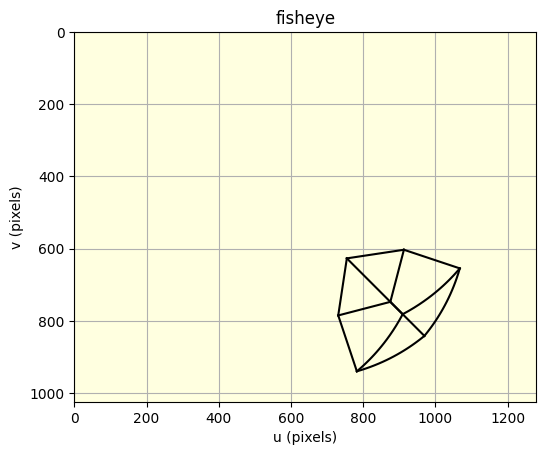

In [65]:
camera.plot_wireframe(X, Y, Z, color="k"); #Визуализирует каркасное представление (wireframe)
                                          # куба с использованием камеры с "рыбьим глазом". color="k"
                                          #задает черный цвет ребер.

## 13.3.2 Catadioptric Camera


Катадиоптрическая Камера

In [66]:
camera = CatadioptricCamera(
          projection="equiangular",
          rho=10e-6,
          imagesize=[1280, 1024],
          maxangle=pi/4
      );
      #Создает объект CatadioptricCamera, моделирующий катадиоптрическую камеру,
      # которая использует сочетание линз и зеркал для достижения широкого поля зрения.
      # maxangle=pi/4 ограничивает угол зрения камеры, что позволяет контролировать искажения на краях изображения.

In [67]:
X, Y, Z = mkcube(1, centre=[1, 1, 0.8], edge=True)
#Аналогично, создает куб для визуализации с помощью катадиоптрической камеры.

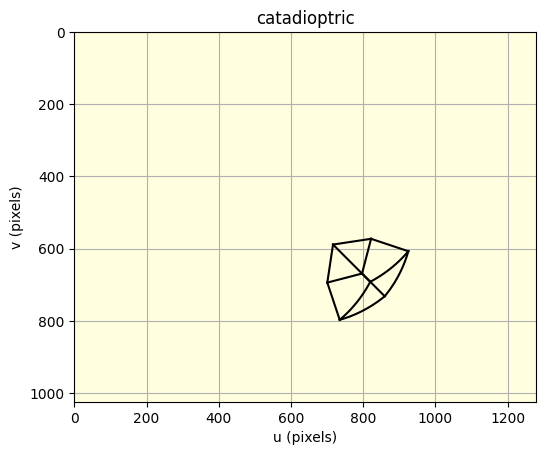

In [68]:
camera.plot_wireframe(X, Y, Z, color="k"); #Визуализирует каркасный куб, используя параметры катадиоптрической камеры.

## 13.3.3 Spherical Camera


In [ ]:
#Сферическая Камера

In [69]:
camera = SphericalCamera() #Создает объект SphericalCamera,
                            #моделирующий сферическую камеру.
                            # Этот тип камеры способен захватывать панорамные изображения в 360 градусов
                            #без необходимости учета конкретных параметров, таких как размер пикселя или размер изображения.

           Name: spherical [SphericalCamera]
     pixel size: 1.0 x 1.0
           pose: t = 0, 0, 0; rpy/yxz = 0°, 0°, 0°

In [70]:
X, Y, Z = mkcube(1, centre=[2, 3, 1], edge=True) #Генерирует куб для демонстрации сферической камеры,
                                                 # размещая его в другом месте пространства относительно камеры.

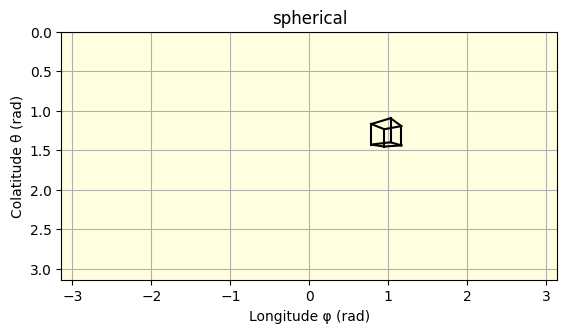

In [71]:
camera.plot_wireframe(X, Y, Z, color="k");  #Визуализирует каркасный куб с помощью сферической камеры.


# 13.4 Unified Imaging Model
## 13.4.1 Mapping Wide-Angle Images to the Sphere


In [72]:
u0 = 528.1214;  #Определяются параметры, необходимые для преобразования изображения с объективом "рыбий глаз" в сферические координаты.
v0 = 384.0784;   #u0 и v0 задают центр искажения на изображении,
l = 2.7899;       #а l и m являются параметрами, характеризующими искажение объектива.
m = 996.4617;

In [73]:
fisheye = Image.Read("fisheye_target.png", dtype="float", mono=True)
      #агружается изображение "fisheye_target.png", преобразованное в монохромное
       #(одноканальное) и в формат с плавающей точкой для последующей обработки

Image: 1024 x 768 (float32) [.../images/fisheye_target.png]

In [74]:
n = 500;                              #n=500 определяет разрешение сетки.
phi_range = np.linspace(-pi, pi, n);  # longitude Создаются сетки координат для долготы (Phi)
theta_range = np.linspace(0, pi, n);     # colatitude и колатитуды (Theta),
                                       #охватывающие всю сферу.
Phi, Theta = np.meshgrid(phi_range, theta_range);

Вычисление Преобразованных Координат

In [75]:
r = (l + m) * np.sin(Theta) / (l - np.cos(Theta)); #Производится преобразование сферических координат
                                                   #в координаты изображения (U, V),
                                                   # используя рассчитанное радиальное расстояние r.
                                                   #Это позволяет соответствующим образом искажать каждую точку для её проекции на сферу.

In [76]:
U = r * np.cos(Phi) + u0;
V = r * np.sin(Phi) + v0;

In [77]:
spherical = fisheye.warp(U, V, domain=(phi_range, theta_range)) #Используется метод warp для преобразования
                                                               # исходного изображения с координатами U и V таким образом,
                                                               # чтобы каждая точка соответствовала своему положению на сфере.
                                                               #Результатом является сферическое изображение spherical.

Image: 500 x 500 (float32), u::-3.14:3.14, v::0:3.14

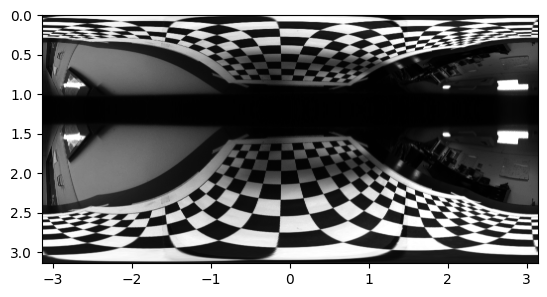

In [209]:
spherical.disp(axes=("$\phi$", "$\theta$")); #Визуализируется сферическое изображение с подписями
                                             #осей для долготы ($\phi$) и колатитуды ($\theta$).


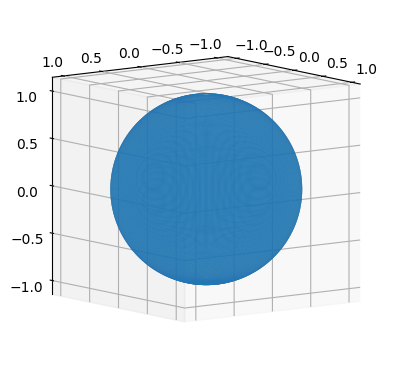

In [210]:
ax = plotvol3();      #создает трехмерное пространство для визуализации,
                      #возвращая объект осей ax, который будет использован для дальнейшей работы.
                      #Эта функция может быть определена пользователем
                      #или представлять собой часть более обширной библиотеки визуализации.
                      # Её задача — подготовить трехмерное пространство для отрисовки объектов.
plot_sphere(radius=1, ax=ax, filled=True, resolution=500,
#plot_sphere() отрисовывает сферу с радиусом 1 в подготовленном трехмерном пространстве ax.
                       #Параметры filled=True и resolution=500 указывают на то, что сфера будет закрашена,
                        #и качество отрисовки будет высоким соответственно.
  facecolors=spherical.colorize().A, cstride=1, rstride=1);
  #facecolors=spherical.colorize().A применяет цвета из сферического изображения к поверхности сферы,
  #делая визуализацию более реалистичной.
      #Здесь предполагается, что spherical.colorize()
      #преобразует одноканальное сферическое изображение в цветное,
      # а .A возвращает массив цветов.
        #cstride и rstride контролируют шаг сетки при отрисовке, что влияет на детализацию сферической сетки.
ax.view_init(azim=-143.0, elev=-9) #настраивает начальный угол обзора для трехмерной визуализации,
                                    #где azim — азимутальный угол (вокруг вертикальной оси),
                                    #а elev — угол подъема (от горизонта).
                                    #Эти параметры позволяют регулировать ориентацию визуализации для лучшего представления результата.

## 13.4.2 Mapping from the Sphere to a Perspective Image


In [218]:
W = 1000; #W задает ширину целевого перспективного изображения в пикселях. В данном случае ширина установлена равной 1000 пикселей.
m = W / 2 / np.tan(np.deg2rad(45 / 2)) #Для вычисления m используется угол обзора камеры
                                       #(в данном случае 45 градусов),
                                       # который представляет собой горизонтальный угол обзора перспективного изображения.
                                       #Этот угол делится на два, поскольку в расчетах требуется угол от центра изображения до его края.
                                       #Затем значение угла конвертируется из градусов в радианы с помощью функции
                                       #np.deg2rad, так как функция тангенса (np.tan) в NumPy работает с радианами.
                                       #В конце происходит деление половины ширины изображения
                                       #W/2 на тангенс полученного угла, что дает значение m.
#Значение m представляет собой фокусное расстояние камеры в единицах пикселей,
#что является важным параметром при проектировании изображений на плоскость.
#Этот параметр используется для расчета координат точек на перспективном изображении
#при их проектировании с сферы, учитывая заданное фокусное расстояние и размер изображения.

1207.1067811865476

In [219]:
l = 0; #Здесь задается l (не используется далее в коде),

In [220]:
u0, v0 = W / 2, W / 2; #центр изображения (u0, v0), который расположен в середине стороны изображения W.

In [221]:
U, V = Image.meshgrid(width=W, height=W); #Image.meshgrid создает сетку координат для перспективного изображения
                                           #с шириной и высотой W, результатом являются матрицы координат U и V

In [222]:
U, V

(array([[  0,   1,   2, ..., 997, 998, 999],
        [  0,   1,   2, ..., 997, 998, 999],
        [  0,   1,   2, ..., 997, 998, 999],
        ...,
        [  0,   1,   2, ..., 997, 998, 999],
        [  0,   1,   2, ..., 997, 998, 999],
        [  0,   1,   2, ..., 997, 998, 999]]),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [997, 997, 997, ..., 997, 997, 997],
        [998, 998, 998, ..., 998, 998, 998],
        [999, 999, 999, ..., 999, 999, 999]]))

In [223]:
print(W)           #Выводит значение ширины изображения и размеры матриц координат,
                   # что помогает проверить корректность их создания.
print(U.shape)

1000
(1000, 1000)


In [224]:
U0 = U - u0;  #Смещает координаты так, чтобы центр координатной сетки находился в точке (0,0).
V0 = V - v0;
r = np.sqrt(U0**2 + V0**2); #Вычисляет радиальное расстояние от центра до каждой точки сетки.
phi = np.arctan2(V0, U0);   #Определяет азимутальный угол phi для каждой точки относительно центра.

In [225]:
Phi = phi;                    #Копирует значения азимутального угла и

Theta = pi - np.arctan(r / m); #вычисляет полярный угол Theta для проекции на сферу.

In [226]:
Phi, Theta

(array([[  -2.356,   -2.355,   -2.354, ...,  -0.7884,  -0.7874,  -0.7864],
        [  -2.357,   -2.356,   -2.355, ...,  -0.7874,  -0.7864,  -0.7854],
        [  -2.358,   -2.357,   -2.356, ...,  -0.7864,  -0.7854,  -0.7844],
        ...,
        [   2.359,    2.358,    2.357, ...,   0.7854,   0.7844,   0.7834],
        [   2.358,    2.357,    2.356, ...,   0.7864,   0.7854,   0.7844],
        [   2.357,    2.356,    2.355, ...,   0.7874,   0.7864,   0.7854]]),
 array([[   2.612,    2.612,    2.613, ...,    2.613,    2.613,    2.612],
        [   2.612,    2.613,    2.613, ...,    2.613,    2.613,    2.613],
        [   2.613,    2.613,    2.613, ...,    2.614,    2.613,    2.613],
        ...,
        [   2.613,    2.613,    2.614, ...,    2.614,    2.614,    2.613],
        [   2.613,    2.613,    2.613, ...,    2.614,    2.613,    2.613],
        [   2.612,    2.613,    2.613, ...,    2.613,    2.613,    2.613]]))

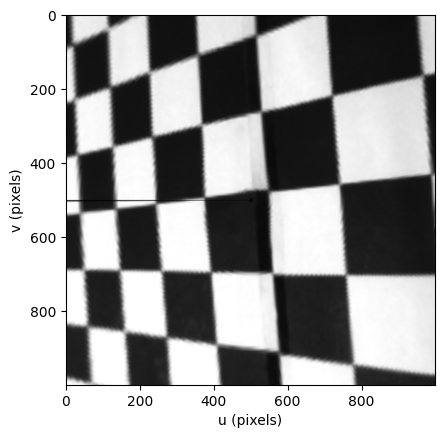

In [227]:
spherical.warp(Phi, Theta).disp(); #Проецирует перспективное изображение обратно на сферу,
                                    #используя вычисленные сферические координаты (Phi, Theta), и отображает результат.

In [228]:
print(spherical) #Выводит информацию о сферическом изображении и размеры массива азимутальных углов для проверки.
print(Phi.shape)

Image: 500 x 500 (float32), u::-3.14:3.14, v::0:3.14
(1000, 1000)


In [229]:
spherical2 = spherical.rotate_spherical(SO3.Ry(0.9) * SO3.Rz(-1.5)) #Вращает сферическое изображение,
                                                                    #применяя к нему комбинацию вращений вокруг осей Y и Z.

Image: 500 x 500 (float64), u::-3.14:3.14, v::0:3.14

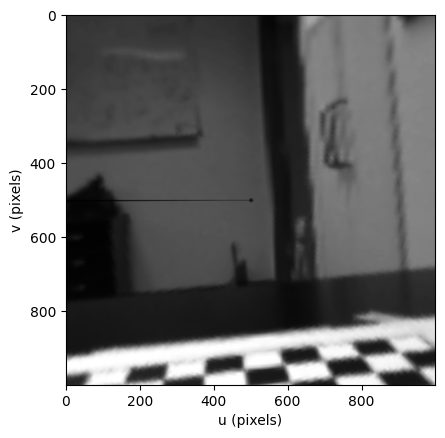

In [230]:
spherical2.warp(Phi, Theta).disp(); #Снова проецирует измененное сферическое изображение на перспективное и отображает результат.
                                     #Это демонстрирует, как можно манипулировать сферическим изображением,
                                    # изменяя его ориентацию перед проектированием обратно на плоскость.

# 13.6 Applications
## 13.6.1 Fiducial Markers


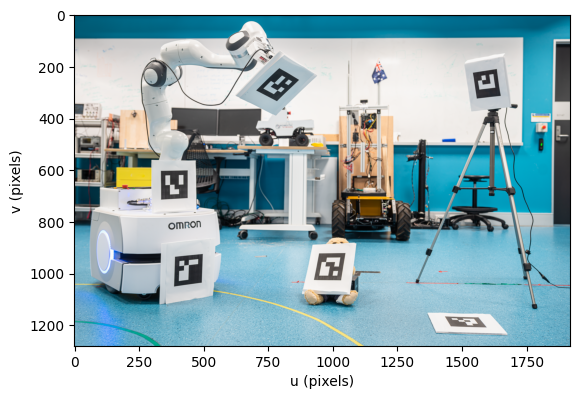

In [91]:
scene = Image.Read("lab-scene.png", rgb=False)
scene.disp();

In [231]:
#Создание Экземпляра Камеры
camera = CentralCamera(f=3045, imagesize=scene.shape,  #Инициализирует модель центральной камеры
                                                      #с заданными параметрами: фокусным расстоянием
                                                      #f=3045, размером изображения,
                                                      # равным размерам загруженной сцены scene.shape,
                                                      # координатами главной точки pp=(2016, 1512) и
                                                      #размером пикселя rho=1.4e-6 метра.
                       pp=(2016, 1512), rho=1.4e-6);
camera

           Name: perspective [CentralCamera]
     pixel size: 1.4e-06 x 1.4e-06
     image size: 1280 x 1920
           pose: t = 0, 0, 0; rpy/yxz = 0°, 0°, 0°
   principal pt: [    2016     1512]
   focal length: [    3045     3045]

In [93]:
markers = scene.fiducial(dict="4x4_50", K=camera.K, side=67e-3); #Распознает фидуциальные маркеры на сцене,
                                              #используя предварительно определенный словарь маркеров "4x4_50".
                                              #Параметр K=camera.K передает внутреннюю матрицу камеры
                                              #для корректного распознавания маркеров,
                                              # а side=67e-3 указывает физический размер стороны маркера в метрах.

In [94]:
markers[2]   #Выводит информацию о третьем маркере в списке распознанных маркеров (индексация начинается с нуля)

id=5: t = -0.538, -0.282, 1.14e+06; rpy/zyx = 145°, 29.5°, -3.62°

In [95]:
markers[2].corners #Выводит координаты углов третьего маркера на изображении.

array([[     947,     1048,     1031,      927],
       [     922,      921,     1025,     1024]], dtype=float32)

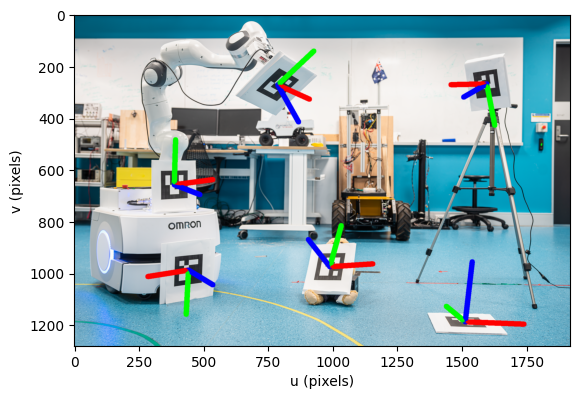

In [235]:
for marker in markers:                        #Для каждого распознанного маркера выполняет его визуализацию
                                              #на исходном изображении сцены. Параметры length=0.10 и thick=20
                                              #задают длину линий и толщину отрисовываемых маркеров соответственно.
  marker.draw(scene, length=0.05, thick=1)
scene.disp();

## 13.6.2 Planar Homography


In [240]:
T_camera = SE3.Tz(8) * SE3.Rx(-2.8);       #Задает позицию и ориентацию камеры с помощью трансформации:
                                            #смещение по оси Z на 8 единиц и вращение вокруг оси X на -2.8 радиан.

camera = CentralCamera.Default(f=0.012, pose=T_camera);  #Создает экземпляр камеры с фокусным расстоянием 0.012 метра и позицией,
                                                         #заданной трансформацией T_camera.

In [241]:
P = np.column_stack([[-1, 1], [-1, 2], [2, 2], [2, 1]]) #Создает матрицу координат четырех точек в плоскости XY.

array([[-1, -1,  2,  2],
       [ 1,  2,  2,  1]])

In [242]:
camera.project_point(np.vstack([P, np.zeros((4,))])) #Проецирует точки P на изображение, добавляя нулевую координату Z (так как точки находятся в плоскости XY).

array([[   347.6,    353.8,    792.4,    804.8],
       [   764.9,    616.3,    616.3,    764.9]])

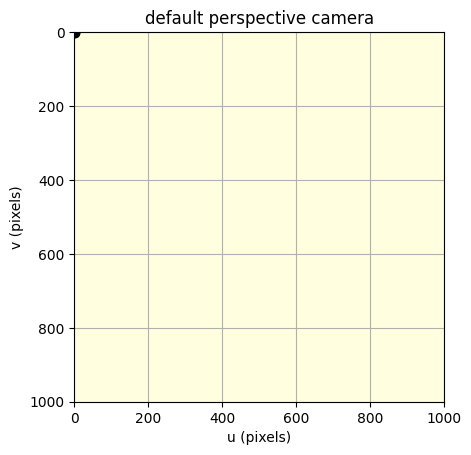

array([[-1, -1,  2,  2],
       [ 1,  2,  2,  1]])

In [243]:
camera.plot_point(P, color="k")

In [245]:
H = np.delete(camera.C(), 2, axis=1) #Получает матрицу калибровки камеры camera.C()
                                     #и удаляет третий столбец, связанный с осью Z, оставляя матрицу гомографии H.

array([[    1200,    167.5,     3769],
       [       0,   -963.2,     6985],
       [       0,    0.335,    7.538]])

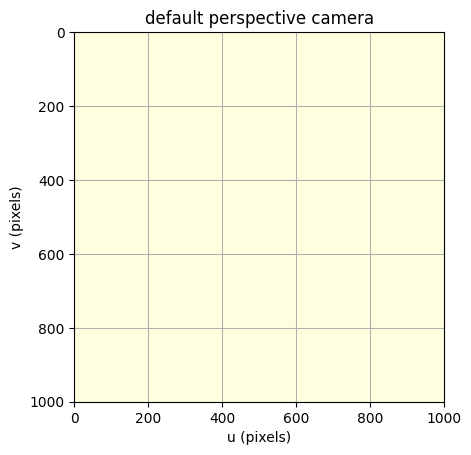

array([[1.915e+05,      nan,     2433],
       [   926.6,      nan,    -2875]])

In [246]:
camera.plot_point(H)

In [251]:
homtrans(H, P) #Применяет гомографию к точкам P, используя функцию homtrans, чтобы получить их новые координаты.

array([[   347.6,    353.8,    792.4,    804.8],
       [   764.9,    616.3,    616.3,    764.9]])

In [252]:
#Обратное Преобразование
p = np.column_stack([[0, 0], [0, 1000], [1000, 1000], [1000, 0]])

array([[   0,    0, 1000, 1000],
       [   0, 1000, 1000,    0]])

In [253]:
Pi = homtrans(np.linalg.inv(H), p) #Задает новый набор точек p и
                                    #применяет обратную гомографию к этим точкам,
                                    #чтобы получить их координаты в исходном пространстве.

array([[  -4.153,   -3.081,    3.081,    4.153],
       [   7.252,   -0.426,   -0.426,    7.252]])

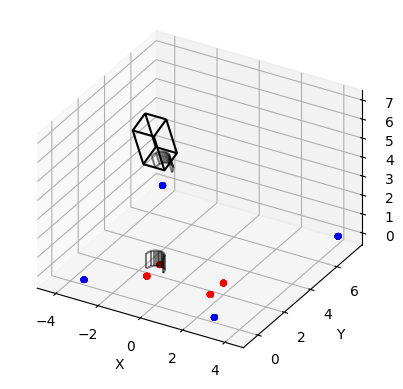

In [254]:
camera.plot(scale=2, color="black");  #Отрисовывает позицию камеры
plot_sphere(radius=0.1, centre=np.vstack((P, np.zeros((4,)))), color="red"); #а затем точки из набора P красным цветом
plot_sphere(radius=0.1, centre=np.vstack((Pi, np.zeros((4,)))), color="blue"); #точки Pi, полученные после обратного преобразования, синим цветом.
  #Использование plot_sphere предполагает визуализацию точек в виде сфер для лучшей наглядности


# 13.7 Advanced Topics
## 13.7.1 Projecting 3D Lines and Quadrics


In [105]:
L = Line3.Join((0, 0, 1), (1, 1, 1)) #Создается 3D-линия L, проходящая через точки (0, 0, 1) и (1, 1, 1).
L

{ -1 1 0; -1 -1 0}

In [106]:
L.w #Выводится векторное представление линии L.

array([      -1,       -1,        0])

In [255]:
camera = CentralCamera.Default(); #Инициализируется камера с параметрами по умолчанию
l = camera.project_line(L)        #а затем 3D-линия L проектируется на изображение
l                                 #получая линию l в координатах изображения.

array([[       1],
       [      -1],
       [       0]])

In [256]:
camera

           Name: default perspective camera [CentralCamera]
     pixel size: 1e-05 x 1e-05
     image size: 1000 x 1000
           pose: t = 0, 0, 0; rpy/yxz = 0°, 0°, 0°
   principal pt: [     500      500]
   focal length: [   0.008    0.008]

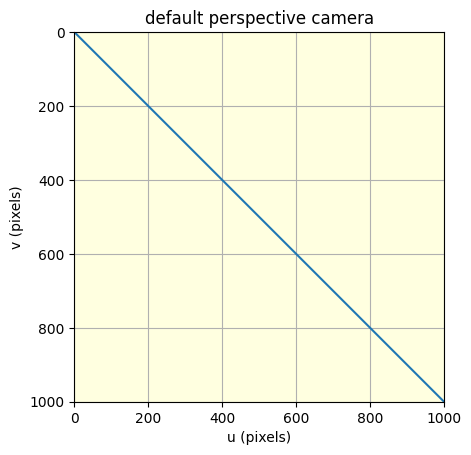

In [258]:
camera.plot_line2(l) #Визуализируется проекция линии l на изображении

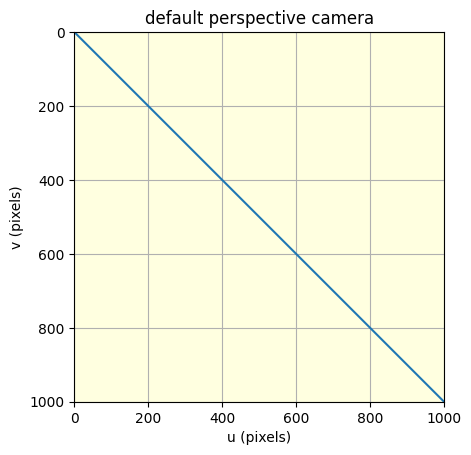

In [257]:
camera.plot_line3(L) # исходная 3D-линия L в трехмерном пространстве.

Проектирование Квадрик

In [110]:
T_camera = pose=SE3.Trans(0.2, 0.1, -5) * SE3.Rx(0.2); #Определяется позиция и ориентация камеры с помощью трансформации SE3.
camera = CentralCamera.Default(f=0.015, pose=T_camera);


In [259]:
T_camera

   1         0         0         0         
   0        -0.9422    0.335     0         
   0        -0.335    -0.9422    8         
   0         0         0         1         


In [260]:
camera

           Name: default perspective camera [CentralCamera]
     pixel size: 1e-05 x 1e-05
     image size: 1000 x 1000
           pose: t = 0, 0, 0; rpy/yxz = 0°, 0°, 0°
   principal pt: [     500      500]
   focal length: [   0.008    0.008]

In [111]:
Q = np.diag([1, 1, 1, -1]); #Определяется квадрика Q в форме диагональной матрицы.
Q

array([[ 1,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0,  1,  0],
       [ 0,  0,  0, -1]])

In [112]:
adj = lambda A: np.linalg.det(A) * np.linalg.inv(A); #Определяется функция для вычисления
                                         #сопряженной матрицы и вычисляется камерная матрица C.
C = camera.C();
np.linalg.det(c[:2, :2])
c = adj(C @ adj(Q) @ C.T)  #Вычисляется сопряженная матрица квадрики в координатах изображения.
c

array([[-5.402e+07, -4.029e+05, 2.389e+10],
       [-4.029e+05, -5.231e+07, 4.122e+10],
       [2.389e+10, 4.122e+10, -3.753e+13]])

In [261]:
np.linalg.det(c[:2, :2]) #Вычисляется сопряженная матрица квадрики в координатах изображения.
# Вычисляется определитель полученной матрицы, что может дать представление о типе квадрики на изображении.

2825691122100722.0

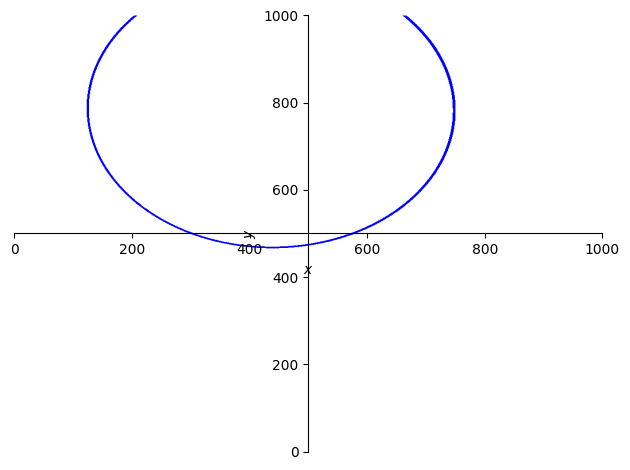

In [114]:
from sympy import symbols, Matrix, Eq, plot_implicit
x, y = symbols("x y")  #Используются символьные вычисления для представления квадрики в терминах переменных x и y,
                       #что позволяет описать её уравнение на плоскости.
X = Matrix([[x, y, 1]]);
ellipse = X * Matrix(c) * X.T;
plot_implicit(Eq(ellipse[0], 1), (x, 0, 1_000), (y, 0, 1_000), ); #В этом примере предполагается,
                                            #что квадрика представляет собой эллипс,
                                            #уравнение которого задается Eq(ellipse[0], 1), и
                                            #диапазон значений для x и y устанавливается от 0 до 1000.